Hello! Let's explore some US bikeshare data!
Enter city from Chicago,Washington,New York City chicago
Enter a month from January ... June or All june
Enter a day eg.Monday ... Sunday or all monday
You have Entered City: chicago , Month: june , Day: monday

Calculating Time Stats...

Most Common months with its counts : 6    12639
Name: month, dtype: int64
Most Common days of week with its counts: Monday    12639
Name: Weekday, dtype: int64
Most Common Hours with its counts:
 17    1726
18    1195
8     1133
16    1038
7      950
Name: hour, dtype: int64
Completed in (hh:mm:ss.ms) 0:00:00.015623
----------------------------------------

Would you like to see next 5 rows? Enter yes or no.
no

Calculating Station Stats...

Most Common Start Stations with its counts:
 Streeter Dr & Grand Ave         236
Clinton St & Washington Blvd    199
Canal St & Adams St             194
Lake Shore Dr & Monroe St       180
Clinton St & Madison St         171
Name: Start Station, dtype: int64
Most Common

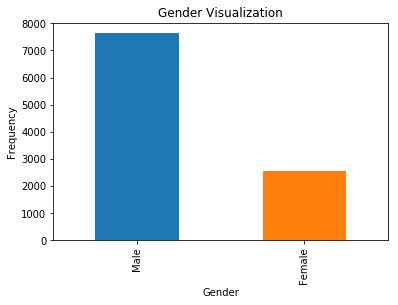

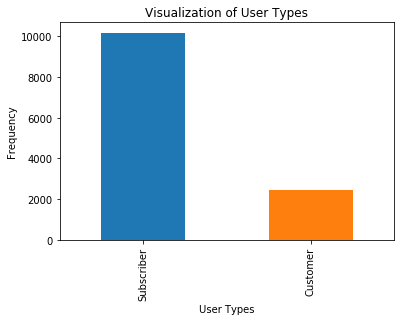

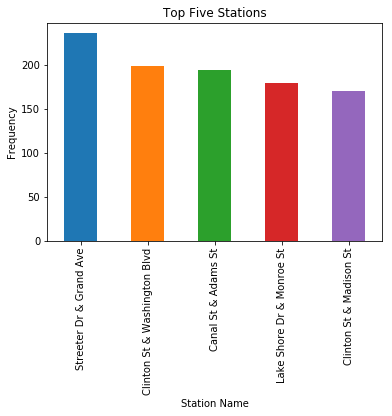


Would you like to restart? Enter yes or no.
no


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt


#Load Dataset
city_data = {'chicago':'chicago.csv',
            'washington': 'washington.csv',
            'new york city' : 'new_york_city.csv'}
cities = ['chicago', 'washington', 'new york city', 'all']
months= ['january', 'february', 'march', 'april', 'may', 'june', 'all']
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday','saturday','sunday', 'all']

#Function to ask user to specify a city, month, and day to analyze
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    
    print('Hello! Let\'s explore some US bikeshare data!')
    while True:
        # get user input for city (chicago, new york city, washington)
        city = input('Enter city from Chicago,Washington,New York City ')
        if city.lower() not in cities:
            print('Enter a valid city,thats not in city list ')
            continue
        else:
            break
    
    while True:
        # get user input for month (all, january, february, ... , june)
        month = input('Enter a month from January ... June or All ')
        if month.lower() not in months:
            print('Enter a valid month,thats not in months list ')
            continue
        else:
            break
    
    while True:
         # get user input for day of week (all, monday, tuesday, ... sunday)
        day = input('Enter a day eg.Monday ... Sunday or all ')
        if day.lower() not in days:
            print('Enter a valid day ')
            continue
        else:
            break
    print(f'You have Entered City: {city.lower()} , Month: {month.lower()} , Day: {day.lower()}')        
    return city.lower() ,month.lower(), day.lower()



def load_data(city,month,day):
    """
    Loads data for the specified city and filters by month and day if applicable
    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """

    # load data file into a dataframe
    
    df = pd.read_csv(city_data[city])
   

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    
    #extract hour from start time to create new column
    df['hour'] = df['Start Time'].dt.hour
    
    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['Weekday'] = df['Start Time'].dt.weekday_name
    
    
     # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month)+1
        
        is_month = df['month'] == month
        df = df[is_month]
    
    # filter by day of week if applicable    
    if day != 'all':
        # filter by day of week to create the new dataframe
        is_weekday = df['Weekday'] == day.title()
        df = df[is_weekday]
        
    return df


def time_stats(df):
    """Displays statistics on the most frequent times of travel."""
    x = 0
    # condition for dispaying 5 rows of data until user inputs 'No'
    while x < len(df.index):
        print('\nCalculating Time Stats...\n')
        
        start_time = datetime.now()
        # displays 5 rows of most common months
        most_common_months = df['month'].value_counts().iloc[x:x+5]
        #below if block checks if the size is zero or not.
        if most_common_months.size == 0:
            print('No More Data to display.You can Enter "No" to proceed further')
        else:
            print("Most Common months with its counts :", most_common_months)
    
        # display the most common 5 days of weeks
        most_common_days = df['Weekday'].value_counts().iloc[x:x+5]
        #below if block checks if the size is zero or not.
        if most_common_days.size == 0:
            print('No More Data to display.You can Enter "No" to proceed further')
        else:
            print("Most Common days of week with its counts:", most_common_days)
    
        # displays 5 rows of most common start hour
        most_common_hours = df['hour'].value_counts().iloc[x:x+5]
        #below if block checks if the size is zero or not.
        if most_common_hours.size == 0:
            print('No More Data to display.You can Enter "No" to proceed further')
        else:
            print("Most Common Hours with its counts:\n" , most_common_hours)
        time_elapsed= datetime.now() - start_time
        print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed))
        print('-'*40)
        x = x+5
        restart = input('\nWould you like to see next 5 rows? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break
    

def station_stats(df):
    """Displays statistics on the most popular stations and trip."""
    x = 0
    # condition for dispaying 5 rows of data until user inputs 'No' 
    while x < len(df.index):
        start_time = datetime.now()
        print('\nCalculating Station Stats...\n')
    
        # displays 5 rows of  most commonly used start station
        most_common_start_stations = df['Start Station'].value_counts().iloc[x:x+5]
        #below if block checks if the size is zero or not.
        if most_common_start_stations.size == 0:
            print('No More Data to display.You can Enter "No" to proceed further')
        else:
            print('Most Common Start Stations with its counts:\n',most_common_start_stations)
    
        # displays 5 rows of most commonly used end station
        most_common_end_stations = df['End Station'].value_counts().iloc[x:x+5]
        #below if block checks if the size is zero or not.
        if most_common_end_stations.size == 0:
            print('No More Data to display.You can Enter "No" to proceed further')
        else:
            print('Most Common End Stations with its counts:\n', most_common_end_stations)
    
        # display 5 rows of  most frequent combination of start station and end station trip
        grouped_data = df.groupby(['Start Station' , 'End Station']).count()
        most_freq_stations = grouped_data['Trip Duration'].sort_values(ascending = False).iloc[x:x+5]
        #below if block checks if the size is zero or not.
        if most_freq_stations.size == 0:
            print('No More Data to display.You can Enter "No" to proceed further')
        else:
            print('Most Frequent Combination of Start station and end station:\n', most_freq_stations)
    
        time_elapsed= datetime.now() - start_time
        print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed))
        print('-'*40)
        x = x+5
        restart = input('\nWould you like to see next 5 rows? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break
    

def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""
    
    # display total travel time
    start_time = datetime.now()
    print('\nCalculating trip duration Stats...\n')
    total_travel_time = df['Trip Duration'].sum()
    print('Total Travel Time:', total_travel_time)
    
    # display mean travel time
    total_mean_time = df['Trip Duration'].mean()
    print('Total Average Time:' , total_mean_time)
    time_elapsed = datetime.now() - start_time
    print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed))
    print('-'*40)
    
def user_stats(df):
    """Displays statistics on bikeshare users."""
    x = 0
    # condition for dispaying 5 rows of data until user inputs 'No' 
    while x < len(df.index):
        #Condition for Washington city as it doesnot contain Gender & Birth Year Columns
        if 'Gender' not in df.columns:
            print('\nCalculating User Stats...\n')
            start_time = datetime.now()
            # Display counts of user types
            counts_of_user = df['User Type'].value_counts()
            print('User types counts:', counts_of_user)
            time_elapsed = datetime.now() - start_time
            print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed))
            print('-'*40)
            break
        else:
            print('\nCalculating User Stats...\n')
            start_time = datetime.now()
            # Display counts of user types
            counts_of_user = df['User Type'].value_counts()
            print('Counts of User Types:', counts_of_user)
            print(' ')
        
            # Display counts of gender
            counts_of_gender = df['Gender'].value_counts()
            print('Counts of gender:', counts_of_gender)
            print('')
            # Display 5 rows of earliest, most recent, and most common years of birth
            most_recent = df['Birth Year'].sort_values(ascending = False).unique()[x:x+5]
            #below if block checks if the size is zero or not.
            if most_recent.size == 0:
                print('No More Data to display.You can Enter "No" to proceed further')
            else:
                print('Most Recent Birth Years are :\n',most_recent)
                
            most_earliest = df['Birth Year'].sort_values(ascending = True ).unique()[x:x+5]
            #below if block checks if the size is zero or not.
            if most_earliest.size == 0:
                print('No More Data to display.You can Enter "No" to proceed further')
            else:
                print('Most Earliest Birth Years are :\n', most_earliest)

            most_common = df['Birth Year'].value_counts().iloc[x:x+5]
            #below if block checks if the size is zero or not.
            if most_common.size == 0:
                print('No More Data to display.You can Enter "No" to proceed further')
            else:
                print('most Common Birth Years are:\n',most_common)
            print('')
            time_elapsed = datetime.now() - start_time
            print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed))            
            print('-'*40)
            x = x+5
            restart = input('\nWould you like to see next 5 rows? Enter yes or no.\n')
            if restart.lower() != 'yes':
                break
    
        

#Additional Functions        
def trip_duration_user_stats(df):
    """Displays Trip Duration as per the User Types"""
    #Condition for Washington city as it doesnot contain Gender & Birth Year Columns
    
    if 'Gender' not in df.columns:
        print('\nCalculating User Stats...\n')
        #gives Trip Duration as per the User Type
        start_time = datetime.now()
        grouped_data = df.groupby('User Type')
        trip_duration_as_per_usertype = grouped_data['Trip Duration'].sum()
        print(f'Total Trip Duration of Each User Type: , {trip_duration_as_per_usertype.apply(int)}')
        time_elapsed = datetime.now() - start_time
        print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed)) 
        print('-'*40)
           
    else:
        print('\nCalculating User Stats...\n')
        #gives Trip Duration as per the User Type
        start_time = datetime.now()
        grouped_data = df.groupby('User Type')
        trip_duration_as_per_usertype = grouped_data['Trip Duration'].sum()
        print(f'Total Trip Duration of Each User Type:  {trip_duration_as_per_usertype.apply(int)}')
        print('')
        #get the count of subscribers & customers according to gender
        grouped_gender = df.groupby('Gender')
        count_as_per_gender = grouped_gender['User Type'].value_counts()
        print(f'Total Count of Subscribers and Customers as per Gender: {count_as_per_gender}')
        time_elapsed = datetime.now() - start_time
        print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed))
        print('-'*40)
        
        
def trip_duration_per_day_stats(df):
    
    """Displays Trip Duration of day entered by user. """    
    start_time = datetime.now()
    #get the trip duration of each day or of all the days.
    grouped_data = df.groupby('Weekday').sum()
    trips = grouped_data['Trip Duration']
    trips_per_day = trips.sort_values(ascending = False)
    
    print(f'Total Trip Duration Per Day: {trips_per_day.apply(int)}')
    time_elapsed = datetime.now() - start_time
    print('Completed in (hh:mm:ss.ms) {}'.format(time_elapsed))
    print('-'*40)
    

def visualization(df):    
    """Displays graphs for better understanding"""
    #Condition for Washington city as it doesnot contain Gender & Birth Year Columns
    if 'Gender' not in df.columns:
        #get the graph of User Types
        df['User Type'].value_counts().plot(kind = 'bar');
        plt.xlabel('User Types')
        plt.ylabel('Frequency')
        plt.title('User Types Visualization')
        plt.show()
        
        #get the top 5 Start Stations
        df['Start Station'].value_counts()[0:5].plot(kind = 'bar')
        plt.xlabel('Station Name')
        plt.ylabel('Frequency')
        plt.title('Top Five Stations')
        plt.show()
        
        
    else:
        #get the graph according to gender 
        df['Gender'].value_counts().plot(kind = 'bar');
        plt.xlabel('Gender')
        plt.ylabel('Frequency')
        plt.title('Gender Visualization')
        plt.show()
        
        #get the graph of User Types
        df['User Type'].value_counts().plot(kind = 'bar');
        plt.xlabel('User Types')
        plt.ylabel('Frequency')
        plt.title('Visualization of User Types')
        plt.show()
        
        #get the top 5 Start Stations
        df['Start Station'].value_counts()[0:5].plot(kind = 'bar')
        plt.xlabel('Station Name')
        plt.ylabel('Frequency')
        plt.title('Top Five Stations')
        plt.show()
        
        

def main():
    while True:
        city,month,day = get_filters()
        df = load_data(city,month,day)
        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        trip_duration_user_stats(df)
        trip_duration_per_day_stats(df)
        visualization(df)
        
        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break
    
if __name__ == "__main__":
    main()